<a href="https://colab.research.google.com/github/Rami-RK/pytorch_tf_app_on_hf_spaces/blob/main/Gradio_app_with_model_training_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Saving a Pytorch trained model and integration with Gradio APP on HF Spaces**


### **Learning Objectives**

At the end of the experiment you will be able to  :

1. save and load a pytorch trained model
2. create a Gradio app and host it on Hugging Face Spaces

## Dataset Preparation

In [1]:
import torch, torchvision
from torchvision import datasets, transforms, models

### **Auto transform using pretrained model**

In [2]:
weights = models.AlexNet_Weights.IMAGENET1K_V1.DEFAULT
print(weights)
auto_transform = weights.transforms()
auto_transform

AlexNet_Weights.IMAGENET1K_V1


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

**Download the data**

In [5]:
!wget -qq https://cdn.iiith.talentsprint.com/aiml/mvsr/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

In [6]:
# Prepare the train and test data
data_dir = '/content/Cat_Dog_data'
trainset = datasets.ImageFolder(data_dir + '/train', transform=auto_transform) # auto_transform # transform
testset = datasets.ImageFolder(data_dir + '/test', transform=auto_transform)

In [7]:
dataset_sizes = {'Train': len(trainset), 'Test': len(testset)}
dataset_sizes

{'Train': 1817, 'Test': 8}

In [8]:
# class_to_idx gives the dictionary mapping of the classname to the index (label)
label_name = trainset.class_to_idx
print(label_name)

# To get class names  trainset.classes
class_name = trainset.classes
print(class_name)

{'cat': 0, 'dog': 1}
['cat', 'dog']


In [9]:
# Load the data. utils.dataloader. Itis a package for loading the dataset
train_loader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=100)
test_loader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=100)

In [10]:
for batch in iter(train_loader):
  print(batch[0].shape, batch[1].shape)

torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([17, 3, 224, 224]) torch.Size([17])


In [11]:
# Get the images and the labels
current_Images, current_labels = next(iter(train_loader))

### Plotting the sample images

In [12]:
current_Images[10].shape

torch.Size([3, 224, 224])

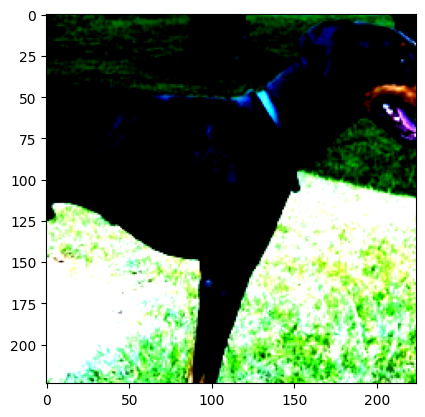

In [13]:
import matplotlib.pyplot as plt
plt.imshow(current_Images[10].permute(1,2,0))

In [14]:
# The label of the current image
current_labels[10]

tensor(1)

## AlexNet


AlexNet was the first convolutional network built for image classification

1.      AlexNet architecture consists of 5 convolutional layers, 3 max-pooling layers, 2 normalization layers, 2 fully connected layers, and 1 softmax layer.

2.      Each convolutional layer consists of convolutional filters and a nonlinear activation function ReLU.

3.      The pooling layers are used to perform max pooling.

4.      Input size is fixed due to the presence of fully connected layers.

5.      The input size is mentioned at most of the places as 224x224x3.

6.      AlexNet overall has nearly 60 million parameters.

### **Updated ways of doing things**

      weights = AlexNet_Weights.IMAGENET1K_V1.DEFAULT

     model_alexnet = models.alexnet(weights=weights)

      preprocess = weights.transforms()

In [15]:
weights = models.AlexNet_Weights.IMAGENET1K_V1.DEFAULT
print(weights)
model_alexnet = models.alexnet(weights=weights)

AlexNet_Weights.IMAGENET1K_V1


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 60.5MB/s]


In [16]:
print(model_alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
# Freezing all Trainable parameters
for param in model_alexnet.parameters():
    param.requires_grad = False

# For unfeezing all weights, give param.requires_grad = True
#for param in model_alexnet.parameters():
#    param.requires_grad = True

In [18]:
import torch
from torch import nn

model_alexnet.classifier[6] = nn.Linear(4096, 2)
model_alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
from torchsummary import summary
model_alexnet.to(device)
summary(model_alexnet, (3, 224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

### Train the model using AlexNet

In [21]:
from torch import optim

criterion = nn.CrossEntropyLoss() ## For binary we can use binary cross entropy

# Train only the last layer
optimizer = optim.Adam([ {'params': model_alexnet.classifier[6].parameters()}], lr=1e-4)

# Uncomment this to train all parameters
#optimizer = optim.Adam(model_alexnet.parameters(), lr=  1e-4)


In [22]:
# No of Epochs
epoch = 5

# Keeping the network in train mode
model_alexnet.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Passing the data to the model (Forward Pass)
      outputs = model_alexnet(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1) #_, => stores all the index of the maximum output
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.005593 Train Accuracy: 72.48 
epoch: 2, Train Loss:0.003017 Train Accuracy: 89.38 
epoch: 3, Train Loss:0.002167 Train Accuracy: 93.01 
epoch: 4, Train Loss:0.001913 Train Accuracy: 94.22 
epoch: 5, Train Loss:0.001639 Train Accuracy: 94.72 


### Test the Model Performance

In [23]:
model_alexnet.eval()

image = current_Images[10]

# Add an extra batch dimension since pytorch treats all images as batches
output = model_alexnet(image.unsqueeze(0).to(device))

_, predicted = torch.max(output, 1)

trainset.classes[predicted.item()], predicted

('dog', tensor([1], device='cuda:0'))

In [24]:
# Keeping the network in evaluation mode
model_alexnet.eval()

Test_accuracy = 0
predictions, test_images = [], []
# Iterate through all the batches in each epoch
for images,labels in test_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass
    outputs = model_alexnet(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()
    test_images.extend(images.cpu())
    predictions.extend(predicted.cpu())

Accuracy = Test_accuracy / len(testset)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 1.0


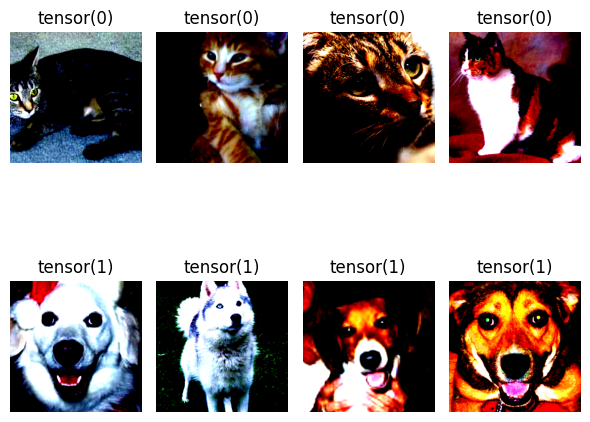

In [25]:
fig, axes = plt.subplots(2, 4, figsize = (6,6))
axes = axes.reshape(-1)
import numpy as np
for i in np.arange(0, len(test_images)):
    axes[i].imshow(test_images[i].permute(1, 2, 0))
    axes[i].set_title(predictions[i])
    axes[i].axis('off')

plt.tight_layout()

### **Saving & Loading the Model**

In [51]:
# Save model
torch.save(model_alexnet.state_dict(), "cat_dog_classifier.pth")

In [52]:
# inspecting the size of model
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_model_size = Path("cat_dog_classifier.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained model size: {pretrained_model_size} MB")

Pretrained model size: 217 MB


### Loading the trained model and attaching with the architecture

In [126]:
model_alexnet.load_state_dict(torch.load(f="cat_dog_classifier.pth", map_location=torch.device("cpu")))
#newmodel.eval()

<All keys matched successfully>

In [ ]:
model_alexnet

### Testing by predicting for an image

In [131]:
model_alexnet.eval()

img = current_Images[10]
img = auto_transform(img).unsqueeze(0)

with torch.inference_mode():
  output = model_alexnet(img).to(device)

_, predicted = torch.max(output, 1)

trainset.classes[predicted.item()], predicted

('dog', tensor([1], device='cuda:0'))

### **Creating a function for prediction which takes an image and give the prediction**

In [146]:
import random
from PIL import Image
from timeit import default_timer as timer

In [151]:
def predict(img):

    # Start the timer
    start_time = timer()

    model_alexnet.eval()

    # Reading the image and size transformation
    features = Image.open(img)
    img = auto_transform(features).unsqueeze(0)

    with torch.inference_mode():
      output = model_alexnet(img).to(device)
    _, predicted = torch.max(output, 1)

    # Create a prediction label and prediction probability dictionary for each prediction class
    # This is the required format for Gradio's output parameter
    pred_labels_and_probs = 'dog' if predicted.item() ==1  else 'cat'

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [152]:
predict('/content/Cat_Dog_data/test/dog/dog.69.jpg')

('dog', 0.05)

### **Creation of Gradio APP**

In [ ]:
!pip install gradio

In [154]:
import gradio as gr

# Create title, description and article strings
title = "Classification Demo"
description = "Cat/Dog classification Transfer Learning dataset"

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type='filepath'), # what are the inputs?
                    outputs=[gr.Label(label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    #examples=example_list,
                    title=title,
                    description=description,)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c808be0e49f651505e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### **Preparing files for uploading in Hugging Face Spaces**

In [99]:
%%writefile model.py

from torch import manual_seed, nn
from torchvision import transforms, models

def create_model_alexnet(num_classes:int=2, seed:int=42):
    """Creates model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head, defaults to 2.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): Alexnet model.
        transforms (torchvision.transforms): Alexnet image transforms.
    """
    # Create Alexnet pretrained weights, transforms and model
    weights = models.AlexNet_Weights.IMAGENET1K_V1.DEFAULT
    auto_transform = weights.transforms()
    model_alexnet = models.alexnet(weights=weights)

    # Freeze all layers in base model
    for param in model_alexnet.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    manual_seed(seed)
    model_alexnet.classifier[6] = nn.Linear(4096, out_features=num_classes)
    return model_alexnet, auto_transform

Writing model_m.py


### **Testing model.py file**

In [ ]:
import model_m

In [ ]:
new_model, transforms = model_m.create_model_alexnet(num_classes=2)

In [ ]:
new_model.load_state_dict(torch.load(f="cat_dog_classifier.pth", map_location=torch.device("cpu")))
#newmodel.eval()

<All keys matched successfully>

In [ ]:
new_model

In [ ]:
new_model.eval()

img = current_Images[10]
img = auto_transform(img).unsqueeze(0)

with torch.inference_mode():
  output = new_model(img).to(device)
_, predicted = torch.max(output, 1)

trainset.classes[predicted.item()], predicted

('dog', tensor([1], device='cuda:0'))

### **Creating Gradio Aapplication**

In [ ]:
%%writefile app.py

### 1. Imports

import gradio as gr
import os
import torch

from model import create_model_alexnet
from timeit import default_timer as timer
from typing import Tuple, Dict

### 2. Model and transforms preparation ###

# Create model_alexnet
model_alexnet, transforms = create_model_alexnet( num_classes=2)

# Load saved weights
model_alexnet.load_state_dict(torch.load(f="cat_dog_classifier.pth", map_location=torch.device("cpu")))  # load to CPU

### 3. Predict function ###

# Create predict function
def predict(img):

    # Start the timer
    start_time = timer()

    model_alexnet.eval()

    # Reading the image and size transformation
    features = Image.open(img)
    img = auto_transform(features).unsqueeze(0)

    with torch.inference_mode():
      output = model_alexnet(img).to(device)
    _, predicted = torch.max(output, 1)

    # Create a prediction label and prediction probability dictionary for each prediction class
    # This is the required format for Gradio's output parameter
    pred_labels_and_probs = 'dog' if predicted.item() ==1  else 'cat'

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels, pred_time


### 4. Gradio app ###

import gradio as gr

# Create title, description and article strings
title = "Classification Demo"
description = "Cat/Dog classification - Transfer Learning "

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type='filepath'), # what are the inputs?
                    outputs=[gr.Label(label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    #examples=example_list,
                    title=title,
                    description=description,)

# Launch the demo!
demo.launch()

In [ ]:
%%writefile requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

### **File structure for uploading on HuggingFace**
To upload our demo Gradio app, we'll want to put everything relating to it into a single directory.

For example, our demo might live at the path `demo/binary_Classification/` with the file structure:

```
demo/
# └── Binary_Classification/
    ├── app.py
    |__ model.py
    |
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    |   └── example_3.jpg
    └── requirements.txt
```

Where:
* `convnet_from_scratch_with_augmentation.keras` is our trained Tensorflow model file.
* `app.py` contains our Gradio app (similar to the code that launched the app).
    * **Note:** `app.py` is the default filename used for Hugging Face Spaces, if you deploy your app there, Spaces will by default look for a file called `app.py` to run. This is changable in settings.
* `examples/` contains example images to use with our Gradio app.
* `model.py` contains the model defintion as well as any transforms assosciated with the model.
* `requirements.txt` contains the dependencies to run our app such as `tensorflow`, `numpy` and `gradio`.



### **Steps for Uploading Classification app on Huggingface spaces**

 **Note:** The following series of steps uses a Git (a file tracking system) workflow.

1. [Sign up](https://huggingface.co/join) for a Hugging Face account.
2. Start a new Hugging Face Space by going to your profile and then [clicking "New Space"](https://huggingface.co/new-space).
    * **Note:** A Space in Hugging Face is also known as a "code repository" (a place to store your code/files) or "repo" for short.
3. Give the Space a name, for example, mine is called `Ramendra/image_classification`, you can see it here: https://huggingface.co/spaces/Ramendra/image_classification
4. Select a license (I used [MIT](https://opensource.org/licenses/MIT)).
5. Select Gradio as the Space SDK (software development kit).
   * **Note:** You can use other options such as Streamlit but since our app is built with Gradio, we'll stick with that.
6. Choose whether your Space is it's public or private (I selected public since I'd like my Space to be available to others).
7. Click "Create Space".
8. Clone the repo locally by running something like: `git clone https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]` in terminal or command prompt.
    * **Note:** You can also add files via uploading them under the "Files and versions" tab.
9. Copy/move the contents of the application files/folder to the cloned repo folder.

  `git remote -v`

10. To upload and track larger files (e.g. files over 10MB or in our case, our PyTorch model file) you'll need to [install Git LFS](https://git-lfs.github.com/) (which stands for "git large file storage").

  `git lfs install`

  Track the files over 10MB with Git LFS with `git lfs track "*.file_extension"`.

  `git lfs track "convnet_from_scratch_with_augmentation.keras"`


13. Track `.gitattributes` (automatically created when cloning from HuggingFace, this file will help ensure our larger files are tracked with Git LFS). You can see an example `.gitattributes` file on the spaces repo unders files.
    * `git add .gitattributes`

14. Add the rest of the `foodvision_mini` app files and commit them with:
    * `git add *`
    * `git commit -m "first commit"`
15. Push (upload) the files to Hugging Face:
    * `git push`
16. Wait 3-5 minutes for the build to happen (future builds are faster) and your app to become live!

If everything worked, you should see a live running example of our classification demo like the one here: https://huggingface.co/spaces/Ramendra/image_classification